# **Download Dataset**

In [ ]:
from google.colab import files, output
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"usupal","key":"8cf51244cd302946f9df4365761cf3a7"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

# change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic


train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


# **Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# **Exploratory Data Analysis (EDA)**

## Titanic DataFrame

In [ ]:
titanic_df = pd.read_csv('/content/train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# size of the data frame
'''
it means this dataset has:(column, row)
'''
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the null values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Number of survived vs not survived passengers
'''
0->not survived
1-> survived
'''
survived_count = titanic_df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

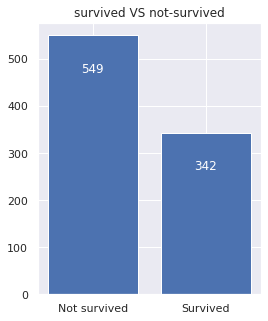

In [ ]:
# ploting the data
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('survived VS not-survived')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='White',
             horizontalalignment='center', verticalalignment='center')
plt.show()

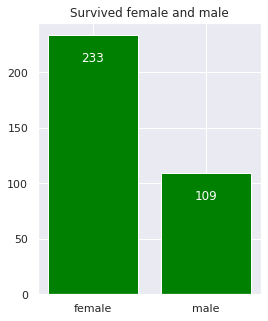

In [ ]:
# survived vs not survived based on Gender
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()

plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values, color = 'Green')
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

## Passenger class, Gender and Embarkation Distribution

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


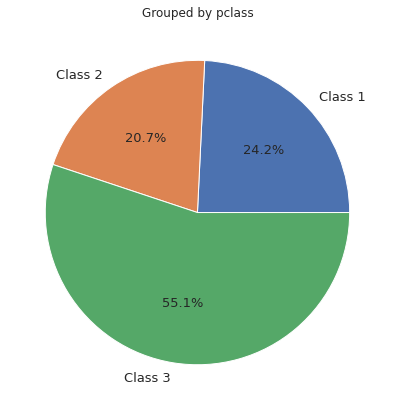

In [ ]:
# group by Passenger Class
pclass_count = titanic_df.groupby('Pclass')['Pclass'].count()
print(pclass_count)
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, 
        labels=['Class 1', 'Class 2', 'Class 3'], 
        autopct='%1.1f%%',
        textprops={'fontsize':13}
        )
plt.show()

Sex
female    314
male      577
Name: Sex, dtype: int64


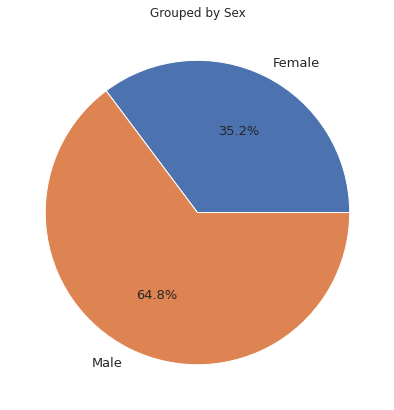

In [ ]:
# group by sex
sex_count = titanic_df.groupby('Sex')['Sex'].count()
print(sex_count)
plt.figure(figsize=(7,7))
plt.title('Grouped by Sex')
plt.pie(sex_count.values, 
        labels=['Female', 'Male'], 
        autopct='%1.1f%%', 
        textprops={'fontsize':13}
        )
plt.show()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


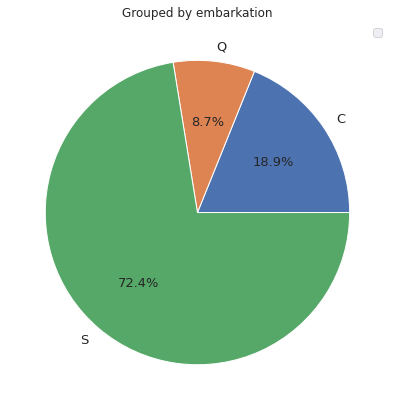

In [ ]:
embarked_count = titanic_df.groupby('Embarked')['Embarked'].count()
print(embarked_count)

plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.legend('upal')
plt.pie(embarked_count.values, labels=['C', 'Q', 'S'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()


## Age Distro


In [ ]:
#Age column contains 177 missing values out of 891 data in total. Lets deal with it
ages = titanic_df[titanic_df['Age'].notnull()]['Age'].values


In [ ]:
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

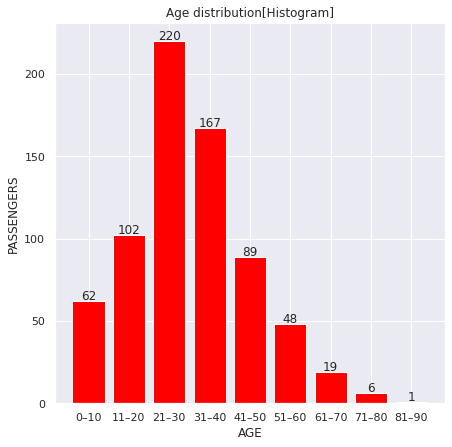

In [ ]:
# ploting histogram
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80','81–90']
plt.figure(figsize=(7,7))
plt.title('Age distribution[Histogram]')
plt.bar(ages_hist_labels, ages_hist[0], color = 'red')
plt.xlabel('AGE')
plt.ylabel('PASSENGERS')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

## Cabin Distro

In [ ]:
titanic_df['Cabin'].unique()[:5]

array([nan, 'C85', 'C123', 'E46', 'G6'], dtype=object)

In [ ]:
def take_initial(x):
    return x[0]

cabins = titanic_df['Cabin'].dropna()
cabins = cabins.apply(take_initial)
cabins_count = cabins.value_counts()
cabins_count

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

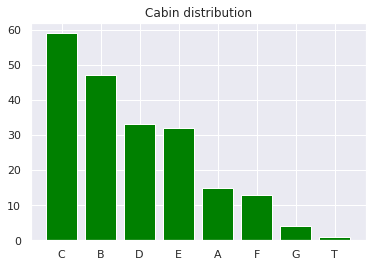

In [ ]:
plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values, color = 'green')
plt.show()

# **Data Preperation**

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Feature Engineering [SibSp & Parch]

In [ ]:
'''creating a new column called 'FamilySize' in which the value is taken from SibSp & Parch. 
This action is taken based on the assumption that larger family size may have greater opportunity
to get survived as they can stay intact with each other better than those who travel alone.
'''
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [ ]:
# embarked has 2 missing value & so it's not a significant number. I'll remove it
titanic_df = titanic_df.dropna(subset=['Embarked'])

## Feature Engineering [Embarked]

In [ ]:
# one hot endoing on 'embraked' feature via pandas
embarked_one_hot = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_one_hot], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


Feature Engineering [Cabin]

In [ ]:
# Handling the missing value of 'Cabin' with 'Unknown'
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('unknown')
titanic_df['Cabin'] = titanic_df['Cabin'].apply(lambda i : i[0])

cabin_one_hot = pd.get_dummies(titanic_df['Cabin'], prefix='Cabin')
titanic_df = pd.concat([titanic_df, cabin_one_hot], axis=1)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_u'],
      dtype='object')

Feature Engineering [Title]

In [ ]:
# Handling Name(title)
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()
titanic_df['Title'] = titanic_df['Name'].apply(get_title)
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# One- Hot encoding to the to the title
title_one_hot = pd.get_dummies(titanic_df['Title'], prefix='Title')
titanic_df = pd.concat([titanic_df, title_one_hot], axis=1)

Feature Engineering [Sex]

In [ ]:
# Handling Sex
sex_one_hot = pd.get_dummies(titanic_df['Sex'], prefix='Sex')
titanic_df = pd.concat([titanic_df, sex_one_hot], axis=1)


Feature Engineering [Age]

In [ ]:
# Handling Age
age_median = titanic_df.groupby('Title')['Age'].median()
age_median

Title
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [ ]:
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Title'] == index:
            return age

titanic_df['Age'] = titanic_df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [ ]:
titanic_df.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_G                 uint8
Cabin_T                 uint8
Cabin_u                 uint8
Title                  object
Title_Capt              uint8
Title_Col               uint8
Title_Don               uint8
Title_Dr                uint8
Title_Jonkheer          uint8
Title_Lady              uint8
Title_Major             uint8
Title_Mast

## Drop all the catagorical Values

In [ ]:
# now dropping all catagorical Columns
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title'], axis=1)

## Normalization

In [ ]:
# normalization via feature scalling
titanic_df = (titanic_df-titanic_df.min())/(titanic_df.max()-titanic_df.min())
titanic_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_u,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.371701,0.000,0.000000,0.016510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.673285,0.000,0.000000,0.101229,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.019854,0.375,0.166667,0.041136,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,1.0,0.334004,0.000,0.333333,0.021731,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.5,0.170646,0.125,0.000000,0.058694,0.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
titanic_df.shape

(889, 38)

## split data [train & test]

In [ ]:
# X = feature; y = target variable
X = titanic_df.iloc[:,1:].values
y = titanic_df['Survived'].values

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# **Logistic Regression**


## Fit

In [ ]:
# #logistic_regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)



## Accuracy

In [ ]:
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(f"{acc_log}%")

84.95%


## Confusion Matrix

In [ ]:
predictions_logR = cross_val_predict(logreg, X_train, y_train, cv=3)
cm_logR = confusion_matrix(y_train, predictions_logR)

In [ ]:
print(cm_logR)

[[381  59]
 [ 66 205]]


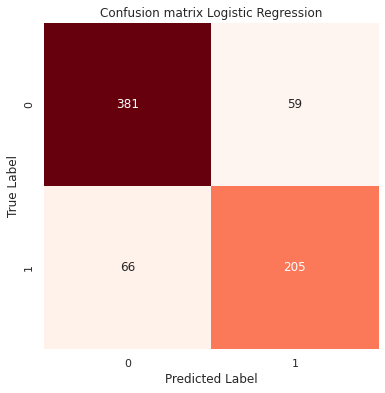

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix Logistic Regression')
sns.heatmap(cm_logR, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ROC curve

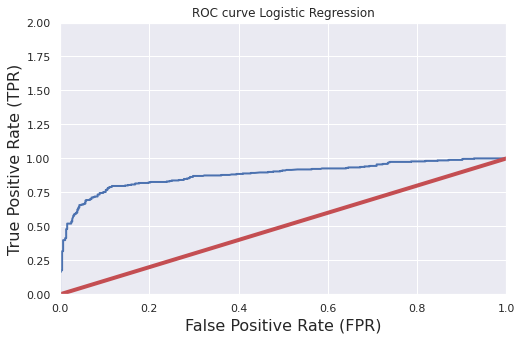

In [ ]:

# getting the probabilities of our predictions
y_scores_lr = logreg.predict_proba(X_train)
y_scores_lr = y_scores_lr[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores_lr)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.title('ROC curve Logistic Regression')
    plt.axis([0, 1., 0, 2])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# **Naive Bayes**

## Fit

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  

## Accuracy

In [ ]:
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(f"{acc_gaussian}%")

69.34%


## Confusion Matrix

In [ ]:
predictions_gnb = cross_val_predict(gaussian, X_train, y_train, cv=3)
cm_gnb = confusion_matrix(y_train, predictions_gnb)

In [ ]:
print(cm_gnb)

[[402  38]
 [160 111]]


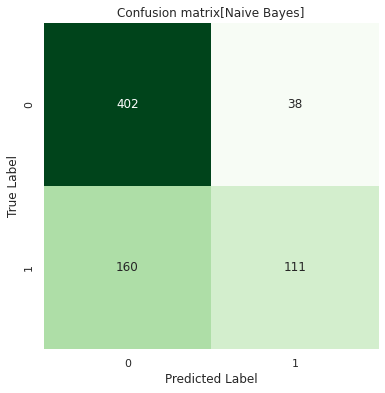

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix[Naive Bayes]')
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')D
plt.show()

## ROC curve

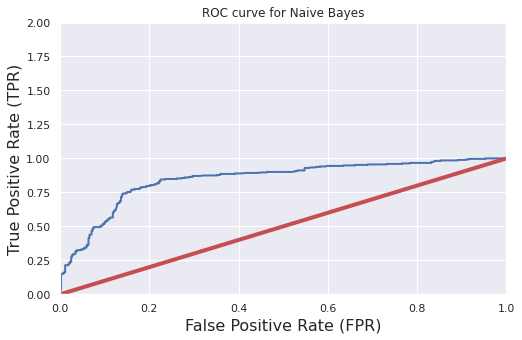

In [ ]:

# getting the probabilities of our predictions
y_scores_nv = gaussian.predict_proba(X_train)
y_scores_nv = y_scores_nv[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores_nv)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.title('ROC curve for Naive Bayes')
    plt.axis([0, 1., 0, 2])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# **SVM**

## Fit

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_preds2 = linear_svc.predict(X_test)

## Accuracy

In [ ]:
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(f'{acc_linear_svc}%')

83.97%


## Confusion Matrix

In [ ]:
predictions_svc = cross_val_predict(linear_svc, X_train, y_train, cv=3)
cm_svc = confusion_matrix(y_train, predictions_svc)

In [ ]:
print(cm_svc)

[[380  60]
 [ 68 203]]


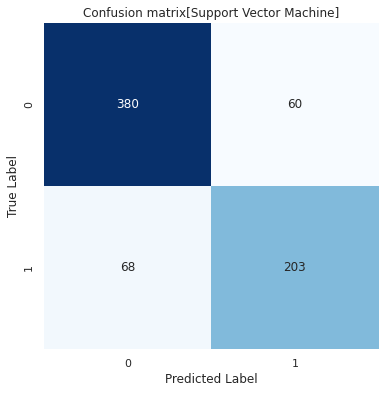

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix[Support Vector Machine]')
sns.heatmap(cm_svc, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ROC curve

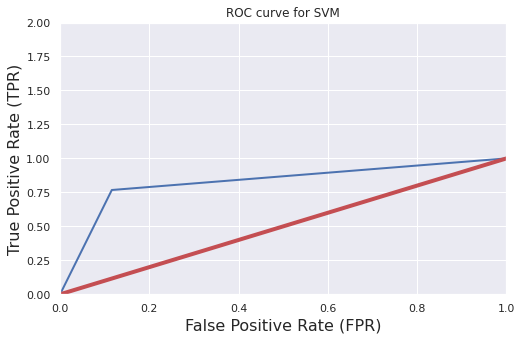

In [ ]:

# getting the probabilities of our predictions
y_scores_svc = linear_svc.predict(X_train)
# y_scores_svc = y_scores_svc[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores_svc)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.title('ROC curve for SVM')
    plt.axis([0, 1., 0, 2])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# **Decision tree**

## Fit

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)  

y_preds3 = decision_tree.predict(X_test) 

## Accuracy

In [ ]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f'{acc_decision_tree}%')

98.87%


## Confusion Matrix

In [ ]:
predictions_dt = cross_val_predict(decision_tree, X_train, y_train, cv=3)
cm_dt = confusion_matrix(y_train, predictions_dt)

In [ ]:
print(cm_dt)

[[368  72]
 [ 84 187]]


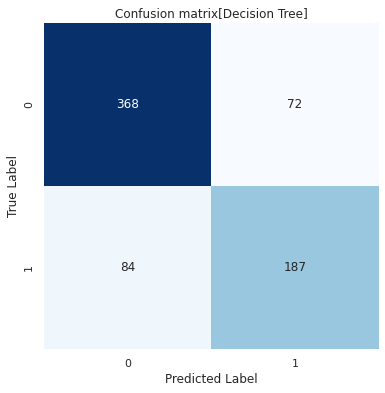

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix[Decision Tree]')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ROC curve

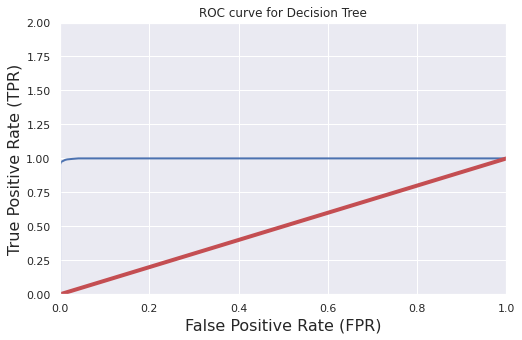

In [ ]:

# getting the probabilities of our predictions
y_scores_dt = decision_tree.predict_proba(X_train)
y_scores_dt = y_scores_dt[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores_dt)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.title('ROC curve for Decision Tree')
    plt.axis([0, 1., 0, 2])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# **Random Forrest**

## Fit

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

## Accuracy

In [ ]:
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(f'{acc_random_forest}%')

98.87%


## Confusion Matrix

In [ ]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
cm_rf = confusion_matrix(y_train, predictions)

In [ ]:
print(cm_rf)

[[383  57]
 [ 68 203]]


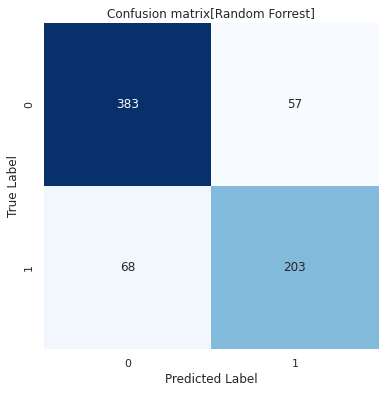

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix[Random Forrest]')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## ROC curve

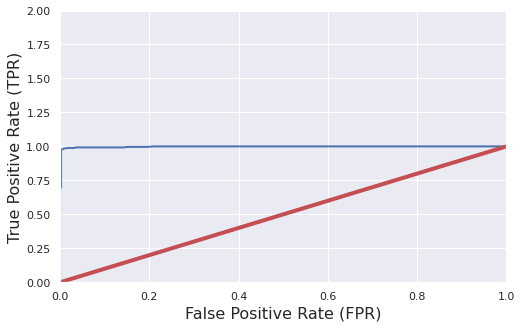

In [ ]:

# getting the probabilities of our predictions
y_scores_rf = random_forest.predict_proba(X_train)
y_scores_rf = y_scores_rf[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores_rf)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1., 0, 2])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(8, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

-----------------------Finished--------------------